In [ ]:
# Abil Pandoli
# 4382211

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer  # This enables the IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

import missingno as msno
%matplotlib inline

# Load the data and explore.

In [3]:
data = pd.read_csv(r"C:\Users\abilp\Desktop\SLC\SEM 3\ADMN5006\Bankruptcy_data.csv")

In [4]:
data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [5]:
data.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222871,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294077,1.900109,0.343320,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.053000,-0.034000,-0.048000,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.052000,0.060000,0.017000,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192000,0.204000,0.131000,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [7]:
# Percent of missing values in each feature
column_null_values = data.isnull().sum()
missing_c_percent = column_null_values/len(data) * 100

missing_c_percent

EPS                   0.005384
Liquidity             0.265957
Profitability         0.265957
Productivity          0.265957
Leverage Ratio        0.027996
Asset Turnover        0.265957
Operational Margin    5.983504
Return on Equity      0.008614
Market Book Ratio     0.061375
Assets Growth         7.215307
Sales Growth          7.215307
Employee Growth       7.548023
BK                    0.000000
dtype: float64

## Lets view the graphs to get a better understanding of how the missing values are distributed in the dataset. 

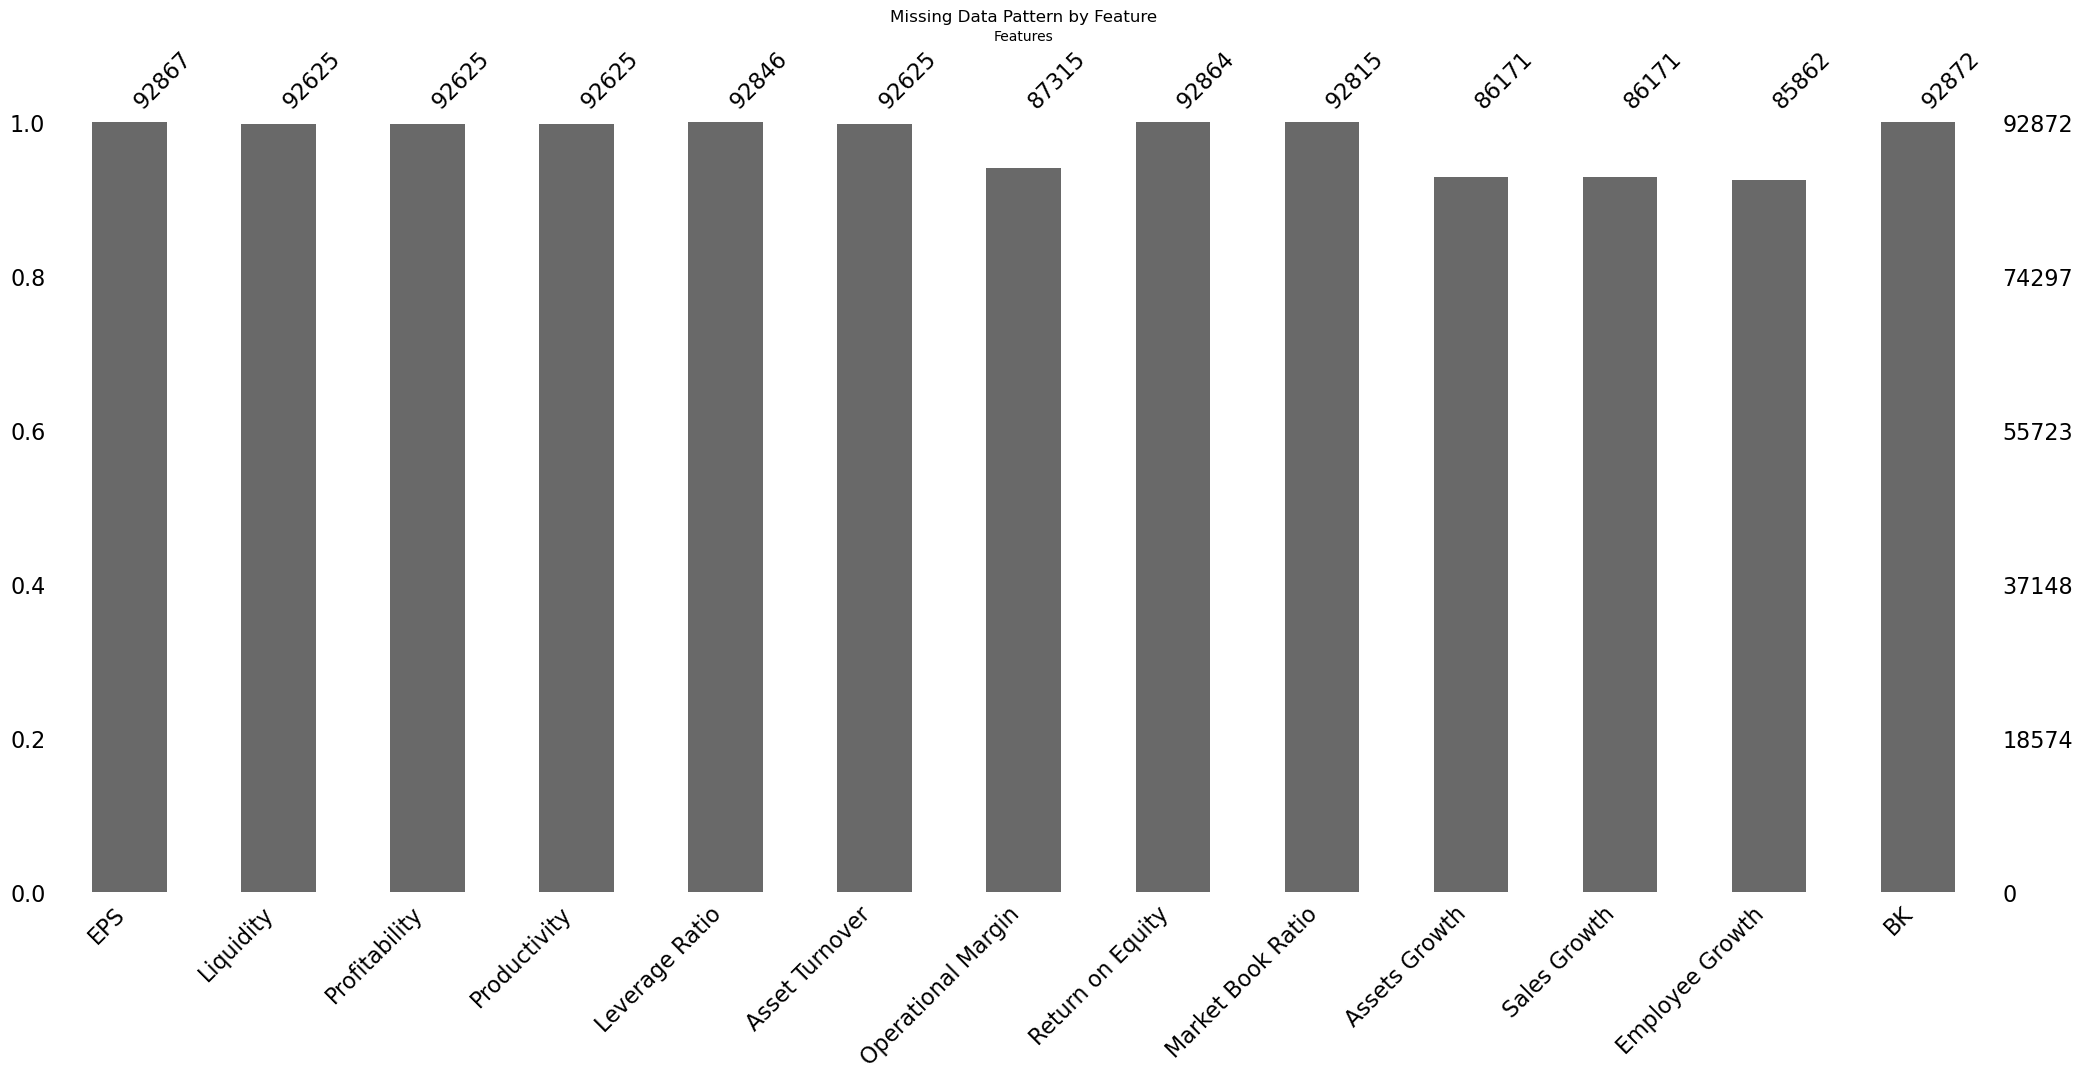

In [8]:
# Visualize missing data patterns as a bar chart
plt.figure(figsize=(10, 6))
msno.bar(data)
plt.title("Missing Data Pattern by Feature")
plt.xlabel("Features")
plt.ylabel("Number of Non-Null Entries")
plt.show()

<Figure size 1000x600 with 0 Axes>

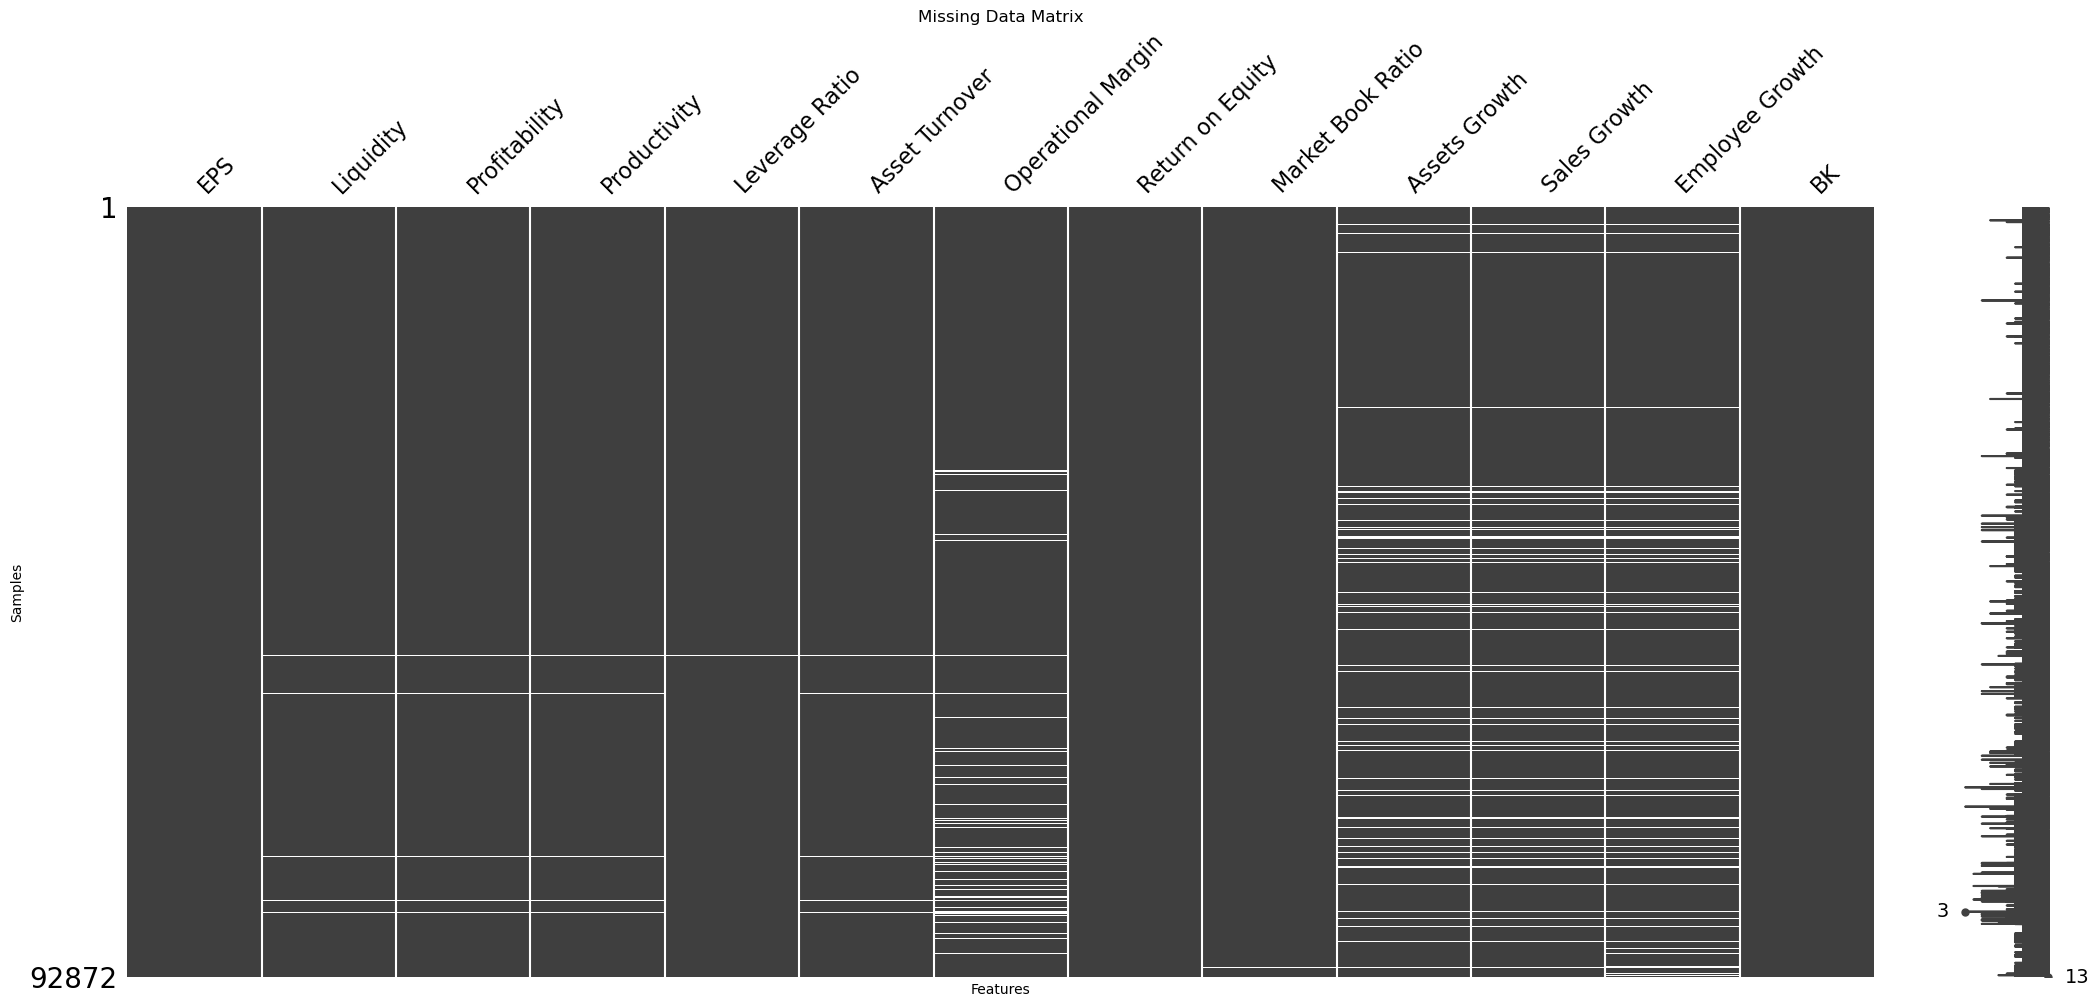

In [9]:
# Visualize a matrix plot of missing data
plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.title("Missing Data Matrix")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

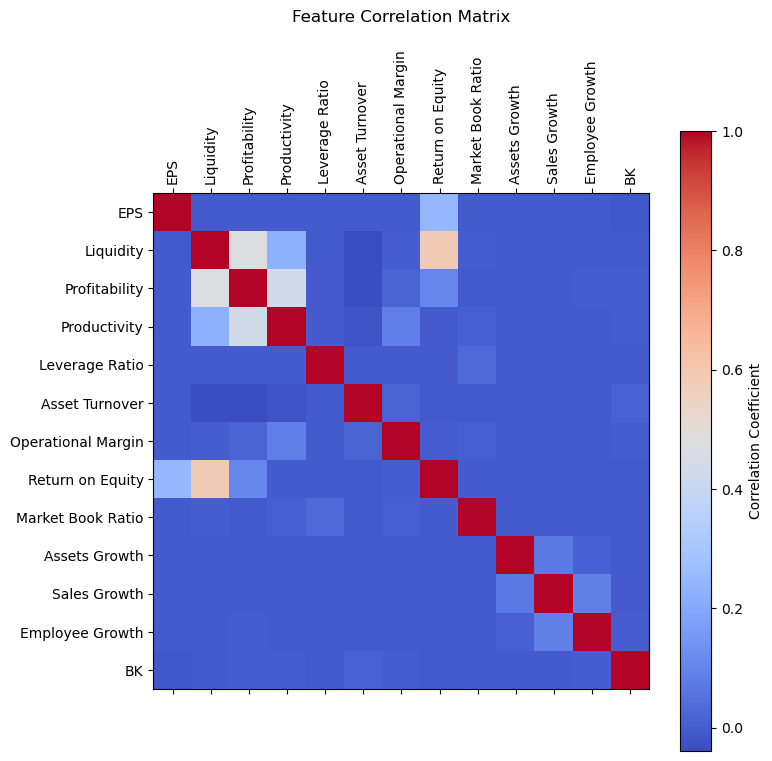

In [11]:
# Correlation matrix
plt.figure(figsize=(8, 8))
correlation_matrix = data.corr()
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar(label="Correlation Coefficient")
plt.title("Feature Correlation Matrix", pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Graph's Interpretation and Further Proceeding

From the initial visualizations, missing values are concentrated in certain features, with 'Employee Growth', 'Assets Growth', and 'Sales Growth' having the highest percentages (over 7%). This suggests that these features may have data collection issues or are harder to measure accurately. Columns like 'EPS' and 'Leverage Ratio' have few missing values, implying they are more consistently available.

The missing data matrix shows that missing values are clustered in specific columns, indicating that some records consistently lack values in these areas, which could affect model performance or require targeted imputation.

The correlation matrix reveals moderate correlations among features such as 'Liquidity', 'Profitability', and 'Productivity', suggesting they may be related. The 'BK' (bankruptcy indicator) does not show a strong correlation with any single feature, implying that predicting bankruptcy might require combining multiple features rather than relying on one.

I must explore imputation strategies for columns with high missing values and consider feature engineering to reduce multicollinearity among correlated features. Since 'BK' has weak correlations with other features, using machine learning to combine these insights might better capture the complex relationships in the dataset. 

In [129]:
# Duplicate the dataset and delete duplicate rows
df = data
duplicate_columns = df.columns[df.T.duplicated(keep='first')]
print("Duplicate columns found:\n", duplicate_columns)
df = df.drop(columns=duplicate_columns)

Duplicate columns found:
 Index([], dtype='object')


# Check for Outliers and distribution

In [131]:
# Define a function to calculate the percentage of outliers for each column in a DataFrame
def percent_outliers(df):
    outliers = 0
    total_rows = len(df)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3, and IQR for the column based on 5th and 95th percentiles
        Q1 = df[column].quantile(0.05)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count values outside the lower and upper bounds
        outliers += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    
    # Calculate percentage of outliers
    return (outliers / total_rows) * 100

# Split the data into non-bankrupt and bankrupt groups
non_bankrupt_df = df[df['BK'] == 0]
bankrupt_df = df[df['BK'] == 1]

# Calculate the percentage of outliers in each group
non_bankrupt_outliers_percent = percent_outliers(non_bankrupt_df)
bankrupt_outliers_percent = percent_outliers(bankrupt_df)

print("Percentage of outliers in non-bankrupt rows:", non_bankrupt_outliers_percent)
print("Percentage of outliers in bankrupt rows:", bankrupt_outliers_percent)


Percentage of outliers in non-bankrupt rows: 23.678965270706502
Percentage of outliers in bankrupt rows: 25.089605734767023


C:\Users\abilp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\abilp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


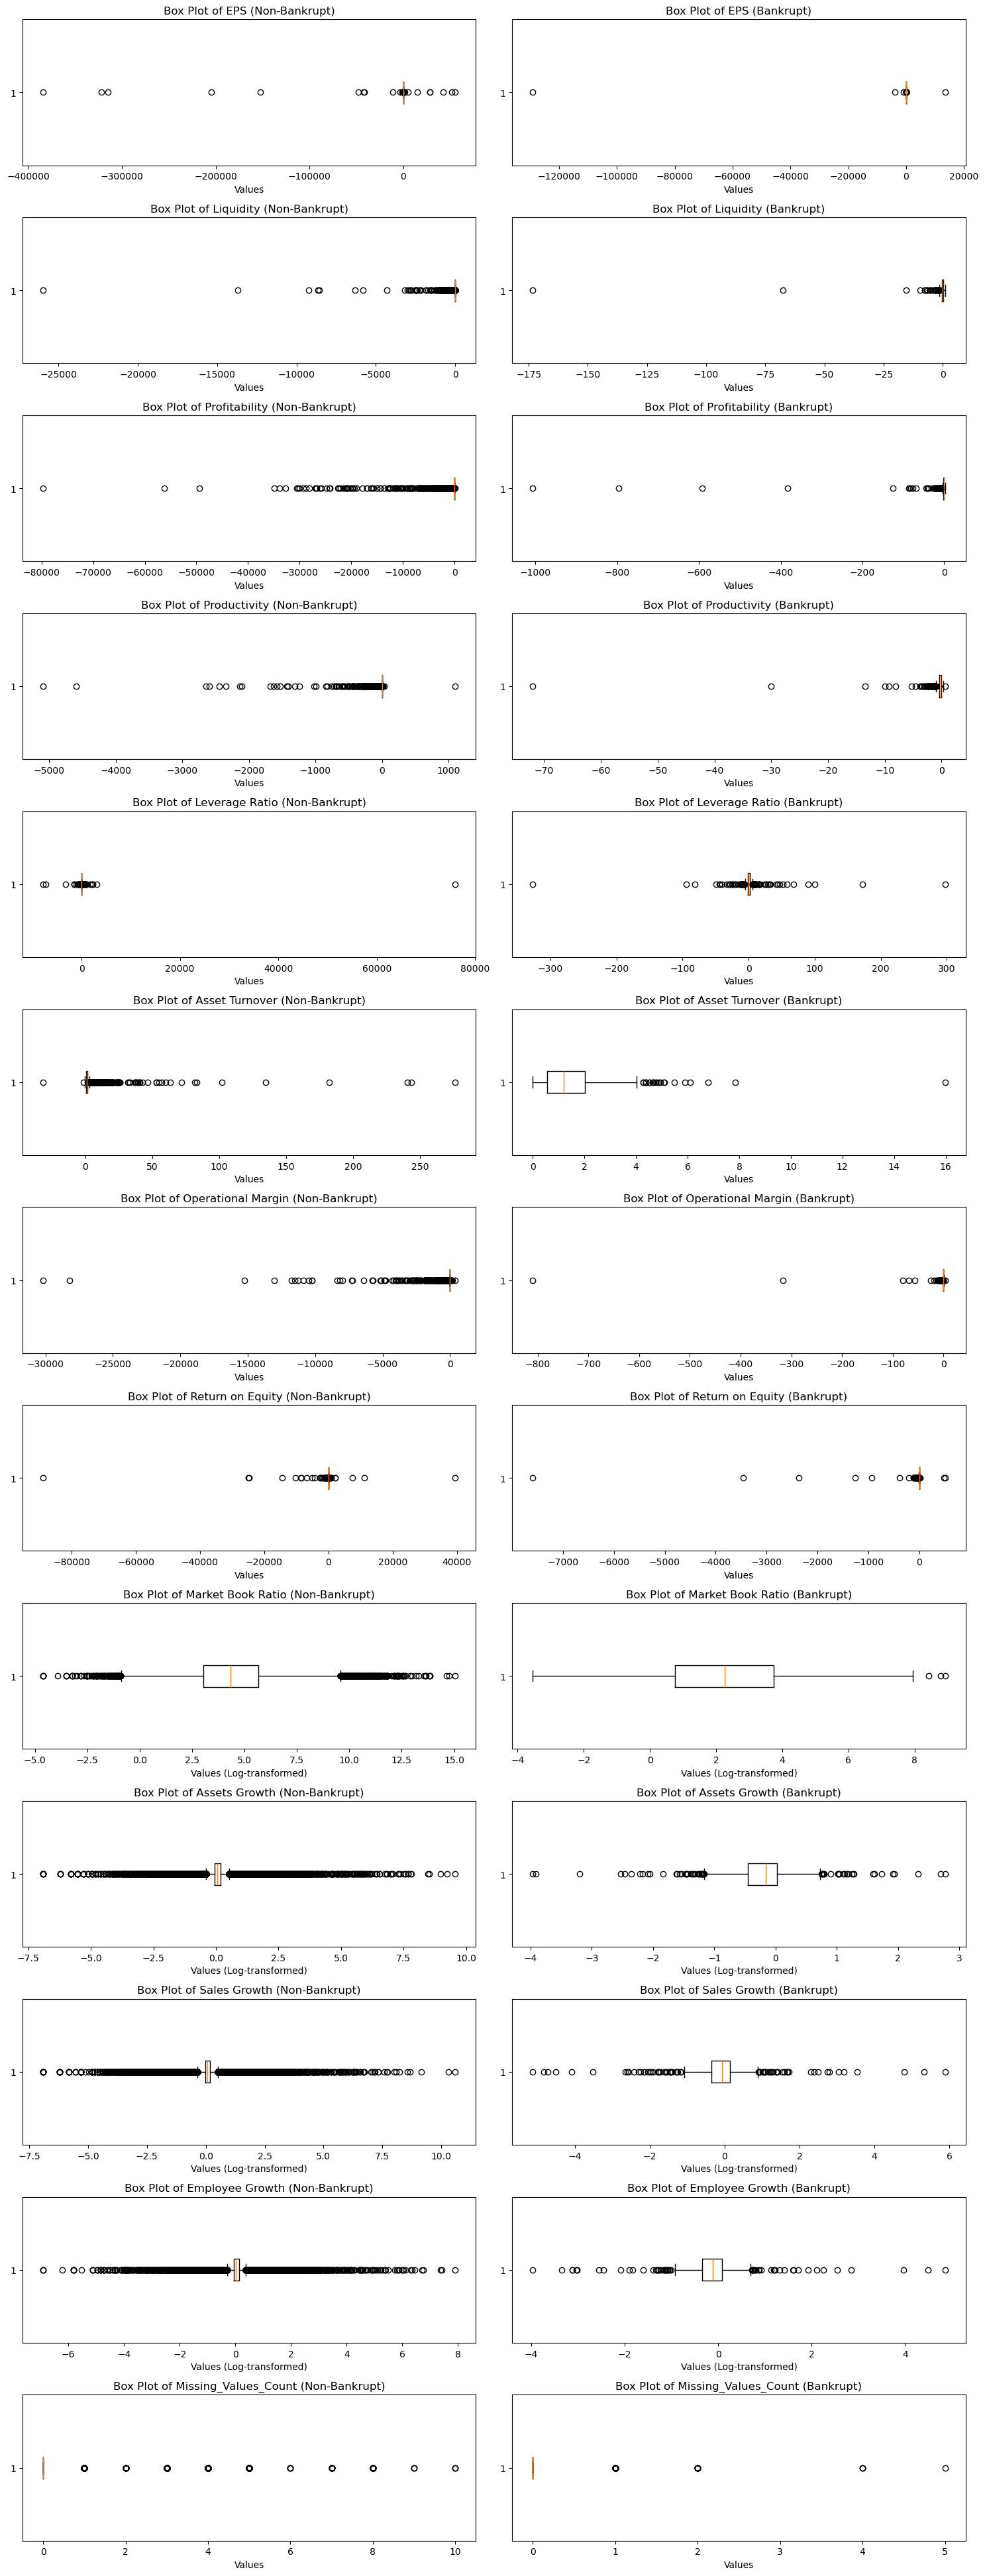

<Figure size 640x480 with 0 Axes>

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation to features with large values
features_to_log_transform = ['Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']

df_transformed = df.copy()
for feature in features_to_log_transform:
    df_transformed[feature] = np.log1p(df_transformed[feature])  # log1p to handle zero values gracefully

# Separate the data into bankrupt and non-bankrupt groups
non_bankrupt_df = df_transformed[df_transformed['BK'] == 0]
bankrupt_df = df_transformed[df_transformed['BK'] == 1]

# Plot individual box plots for each feature for both groups
numeric_columns = df_transformed.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('BK')  # Exclude the target column

plt.figure(figsize=(15, 3 * len(numeric_columns)))  # Adjust figure size for number of features

for i, column in enumerate(numeric_columns, 1):
    # Plot for non-bankrupt group
    plt.subplot(len(numeric_columns), 2, 2 * i - 1)
    plt.boxplot(non_bankrupt_df[column].dropna(), vert=False)
    plt.title(f"Box Plot of {column} (Non-Bankrupt)")
    plt.xlabel("Values (Log-transformed)" if column in features_to_log_transform else "Values")

    # Plot for bankrupt group
    plt.subplot(len(numeric_columns), 2, 2 * i)
    plt.boxplot(bankrupt_df[column].dropna(), vert=False)
    plt.title(f"Box Plot of {column} (Bankrupt)")
    plt.xlabel("Values (Log-transformed)" if column in features_to_log_transform else "Values")

plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\abilp\Desktop\SLC\SEM 3\ADMN5006\box.png")


# Observed Trends:

Extreme Outliers in Non-Bankrupt Group:
Non-bankrupt companies exhibit a higher spread of extreme values, especially on the negative side, in features like "EPS", "Liquidity", and "Profitability". This may indicate that while these companies have wide-ranging performance, they still manage to avoid bankruptcy.

Constrained Range in Bankrupt Group:
Bankrupt companies generally show a tighter distribution around certain ranges in most features, such as "Asset Turnover" and "Operational Margin". This could imply that bankrupt companies follow a certain financial pattern or threshold beyond which they fail to remain solvent.

Log Transformation Effect:
Log-transformed features such as "Market Book Ratio" and "Assets Growth" reveal that bankrupt companies tend to fall within narrower, possibly healthier ranges for these metrics, while non-bankrupt companies have more varied financial activities.

# Potential Reasoning:

Financial Stability and Risk Tolerance:
Non-bankrupt companies might be able to handle extreme financial metrics (both high and low) due to their capital reserves, risk management, or diversified assets. Bankrupt companies, however, may lack these buffers, leading them to fail when performance declines.

Characteristic Financial Patterns:
Certain features like "Operational Margin" and "Liquidity" could act as financial stability indicators. Bankrupt companies showing smaller variances in these metrics may signal that they lack flexibility in adjusting to economic fluctuations.

In [133]:
len(df)

92872

In [113]:
# Step 1: Handle missing values - drop rows with more than 4 missing values or critical columns missing
critical_columns = ['EPS', 'Liquidity', 'Profitability', 'Leverage Ratio', 'Operational Margin', 'Assets Growth']
df['Missing_Values_Count'] = df.isnull().sum(axis=1)
df = df[(df['Missing_Values_Count'] <= 4) & (df[critical_columns].notnull().all(axis=1))]
df = df.drop(columns=['Missing_Values_Count'])

# Cleaning the dataset

I separated the target variable "BK" (bankruptcy status) from the features to clarify what the model is predicting. Keeping the target variable distinct allowed me to handle the features without risk of contaminating the target with any preprocessing changes.

In [114]:
# Step 1: Split the data into features and target
X = df.drop(columns=['BK'])
y = df['BK']

I split the data into training and test sets before any transformations to prevent data leakage. This way, no information from the test set could influence the training process, giving me a realistic measure of model performance on unseen data.

In [115]:
# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I dropped rows with excessive missing values, especially those missing in critical columns like "EPS" and "Liquidity." This helped me focus on records with meaningful information, which is essential for maintaining data integrity. Rather than imputing these values, I chose to remove them to avoid introducing unreliable data, which could skew the results.

For remaining missing values, I used an iterative imputation method that leverages relationships between features. I avoided simpler methods like mean or median imputation because they don’t account for inter-feature relationships, and I didn’t want to use a more complex model-based imputer to avoid overfitting at this stage.

In [116]:
# Step 3: Apply Iterative Imputer to remaining missing values on the training set and use the same imputer on the test set
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [117]:
# Step 4: Feature Engineering on imputed training and test sets

# 1. Liquidity Ratio
X_train_imputed['Liquidity Ratio'] = X_train_imputed['Liquidity'] / (X_train_imputed['Assets Growth'] + 1e-9)
X_test_imputed['Liquidity Ratio'] = X_test_imputed['Liquidity'] / (X_test_imputed['Assets Growth'] + 1e-9)

# 2. Profitability Ratio
X_train_imputed['Profitability Ratio'] = X_train_imputed['Profitability'] / (X_train_imputed['Assets Growth'] + 1e-9)
X_test_imputed['Profitability Ratio'] = X_test_imputed['Profitability'] / (X_test_imputed['Assets Growth'] + 1e-9)

Instead of completely removing outliers, I applied Winsor capping, limiting extreme values to the 5th and 95th percentiles. This approach kept the dataset’s integrity by retaining the majority of the data while reducing the influence of extreme values. Removing outliers might have discarded important information, especially since I’m dealing with financial data where extremes can be meaningful.

In [118]:
# Step 5: Apply Winsor Capping (5th and 95th percentiles) only on the training set and use the same caps on the test set
for column in X_train_imputed.select_dtypes(include=['float64', 'int64']).columns:
    lower_cap = X_train_imputed[column].quantile(0.05)
    upper_cap = X_train_imputed[column].quantile(0.95)
    X_train_imputed[column] = np.clip(X_train_imputed[column], lower_cap, upper_cap)
    X_test_imputed[column] = np.clip(X_test_imputed[column], lower_cap, upper_cap)

I applied log transformation to certain skewed features to compress high values and achieve a more symmetric distribution. I avoided other transformations like Box-Cox because log transformation is straightforward, and I didn’t need to handle negative values. Log transformation allowed me to reduce skewness without overly complicating the process.

In [119]:
# Step 6: Apply log transformation to skewed features to reduce impact of extreme values (train and test separately)
features_to_log_transform = ['Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']
for feature in features_to_log_transform:
    X_train_imputed[feature] = np.log1p(X_train_imputed[feature])
    X_test_imputed[feature] = np.log1p(X_test_imputed[feature])

C:\Users\abilp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Robust scaling was chosen because it’s less sensitive to outliers than standard scaling. Since I had already Winsorized the data, I didn’t need aggressive scaling, but I still wanted to ensure all features were on a comparable scale. Robust scaling based on median and IQR was a balanced approach that maintained data stability.

In [120]:
# Step 7: Apply Robust Scaling based on training set only and transform the test set with the same scaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

After transformations, I performed a final imputation using median values to handle any remaining NaNs. Rather than dropping these rows, I chose imputation to preserve as much data as possible. This final imputation step ensured a complete dataset for SMOTE and model training.

In [121]:
# Step 8: Final imputation to handle any remaining NaNs after transformations
# Use median imputation here to handle any remaining NaNs
X_train_scaled = X_train_scaled.fillna(X_train_scaled.median())
X_test_scaled = X_test_scaled.fillna(X_test_scaled.median())

The dataset had a significant class imbalance, with far fewer bankrupt cases. I used SMOTE rather than undersampling because undersampling would discard valuable non-bankrupt data, and I avoided synthetic techniques like ADASYN to keep it simple and effective. SMOTE balanced the dataset by generating synthetic samples for the minority class, improving the model’s ability to detect bankruptcies.

In [122]:
# Step 8: Apply SMOTE to handle class imbalance on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

To simplify the dataset, I used PCA to reduce dimensionality. Rather than selecting features manually or using complex feature selection methods, PCA allowed me to retain the most variance while eliminating redundancy. This approach reduced complexity without sacrificing important information, helping to avoid overfitting and speeding up training.

In [123]:
# Step 10: Apply PCA for dimensionality reduction to the top 10 components
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

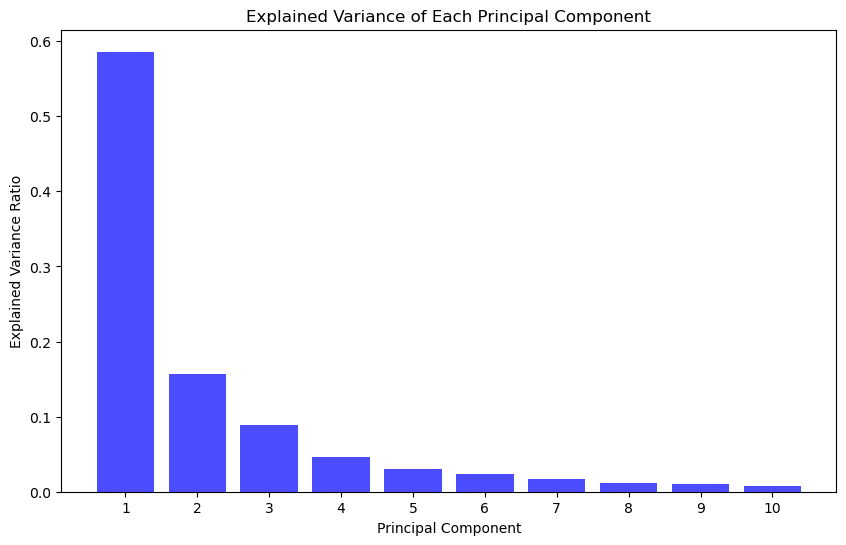

In [124]:
# PCA bar graph
plt.figure(figsize=(10, 6))
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.7, color='b', label="Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance of Each Principal Component")
plt.xticks(components)
plt.show()

I trained a Random Forest model because it’s robust, interpretable, and performs well with a variety of data distributions. I chose this over simpler models like logistic regression, as Random Forest can capture non-linear relationships, and it provides a strong baseline for comparison with more complex models.

In [125]:
# Step 11: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_pca)
y_prob_rf = rf_model.predict_proba(X_test_pca)[:, 1]

I chose XGBoost as a complementary model due to its effectiveness in handling class imbalance and capturing complex relationships. While Random Forest provides robustness and interpretability, XGBoost’s gradient boosting algorithm is powerful for imbalanced datasets, giving me a more nuanced comparison and potentially better performance.

In [127]:
# Step 12: Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_pca, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_pca)
y_prob_xgb = xgb_model.predict_proba(X_test_pca)[:, 1]

C:\Users\abilp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:25:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Interpretation of the results:
# Random Forest Model: **High Accuracy (9)**: The model accurately predicts most cases, mainly non-bankrupt ones.- **Poor Performance on Bankrupt Ces**: Precision (11%) and recall (22%) are low for identifying bankrupt cases, meaning it struggles with minority class detection
- **ROC AUC Score (88)**: Indicates good overall performance but still reflects difficulty in capturing bankrupt cases effective

### XGBoost Mol:
- **Slightly Lower Accura (95%)**: Performs well overall, but less accurate than Random Forest due to higher false posites.
- **Better Detection of Bankrt Cases**: Precision (6%) and recall (42%) for bankrupt cases are slightly better than Random Forest, showing some improvement in minority class deteion.
- **ROC AUC Sce (0.83)**: Lower than Random Forest, but XGBoost shows improved balance in identifying bankrupt coies.

###ummary:
- **ndom Forest** is more accurate but struggles with minority class tection
- **XGBoost** sacrifices some accuracy but offers slightly better identification of bankrupt cases.
- Both models need improvement in detecting bankrupt companies due to class imbalance.

In [128]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Calculate confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_tn, rf_fp, rf_fn, rf_tp = rf_conf_matrix.ravel()

print("Random Forest Model - Confusion Matrix and Metrics")
print("True Negatives (TN):", rf_tn)
print("False Positives (FP):", rf_fp)
print("False Negatives (FN):", rf_fn)
print("True Positives (TP):", rf_tp)
print()
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score for Random Forest:", roc_auc_score(y_test, y_prob_rf))

# Calculate confusion matrix for XGBoost
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_tn, xgb_fp, xgb_fn, xgb_tp = xgb_conf_matrix.ravel()

print("\nXGBoost Model - Confusion Matrix and Metrics")
print("True Negatives (TN):", xgb_tn)
print("False Positives (FP):", xgb_fp)
print("False Negatives (FN):", xgb_fn)
print("True Positives (TP):", xgb_tp)
print()
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score for XGBoost:", roc_auc_score(y_test, y_prob_xgb))

Random Forest Model - Confusion Matrix and Metrics
True Negatives (TN): 16010
False Positives (FP): 178
False Negatives (FN): 88
True Positives (TP): 25

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16188
           1       0.12      0.22      0.16       113

    accuracy                           0.98     16301
   macro avg       0.56      0.61      0.57     16301
weighted avg       0.99      0.98      0.99     16301

ROC AUC Score for Random Forest: 0.8726154083326227

XGBoost Model - Confusion Matrix and Metrics
True Negatives (TN): 15470
False Positives (FP): 718
False Negatives (FN): 68
True Positives (TP): 45

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16188
           1       0.06      0.40      0.10       113

    accuracy                           0.95     16301
   macro avg       0.53 

# Outlier removal method

In [136]:
# Define a function to calculate outliers for each column in a DataFrame
def count_outliers(df):
    outliers = 0
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = df[column].quantile(0.05)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count values outside the lower and upper bounds
        outliers += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers

# Split the data into non-bankrupt and bankrupt groups
non_bankrupt_df = df[df['BK'] == 0]
bankrupt_df = df[df['BK'] == 1]

# Calculate the number of outliers in each group
non_bankrupt_outliers = count_outliers(non_bankrupt_df)
bankrupt_outliers = count_outliers(bankrupt_df)

print("Total number of outliers in non-bankrupt rows:", non_bankrupt_outliers)
print("Total number of outliers in bankrupt rows:", bankrupt_outliers)

Total number of outliers in non-bankrupt rows: 21859
Total number of outliers in bankrupt rows: 140


In [137]:
# Define the quantiles for outlier detection
lower_quantile = 0.004
upper_quantile = 0.995

# Create a copy of the DataFrame to avoid modifying the original data
df_filtered = df.copy()

# Drop rows with extreme values based on both quantiles for non-bankrupt rows only
for column in df_filtered.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'BK':  # Skip the 'BK' column
        # Calculate the quantile bounds for the current column
        lower_bound = df_filtered[column].quantile(lower_quantile)
        upper_bound = df_filtered[column].quantile(upper_quantile)
        
        # Filter out rows where:
        # 1. The row is non-bankrupt AND value is above upper bound OR
        # 2. The row is non-bankrupt AND value is below lower bound
        df_filtered = df_filtered[~((df_filtered['BK'] == 0) & 
                                  ((df_filtered[column] > upper_bound) | 
                                   (df_filtered[column] < lower_bound)))]

remaining_extreme_values = {}

for column in df_filtered.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'BK':  # Skip the 'BK' column
        upper_bound = df_filtered[column].quantile(upper_quantile)
        
        # Count values above the 75th percentile in non-bankrupt rows in the filtered data
        extreme_values_above_75th = ((df_filtered['BK'] == 1) & (df_filtered[column] > upper_bound)).sum()
        
        # Store count of remaining extreme values for this column in non-bankrupt rows
        remaining_extreme_values[column] = extreme_values_above_75th

# Display the count of remaining extreme values for each column in non-bankrupt rows, excluding 'BK'
remaining_extreme_values_df = pd.DataFrame(list(remaining_extreme_values.items()), columns=['Column', 'Number of Remaining Extreme Values (Non-Bankrupt Rows)'])
print("Remaining Extreme Values Above 75th Percentile in Non-Bankrupt Rows (Excluding BK Column):")
print(remaining_extreme_values_df)

Remaining Extreme Values Above 75th Percentile in Non-Bankrupt Rows (Excluding BK Column):
                  Column  \
0                    EPS   
1              Liquidity   
2          Profitability   
3           Productivity   
4         Leverage Ratio   
5         Asset Turnover   
6     Operational Margin   
7       Return on Equity   
8      Market Book Ratio   
9          Assets Growth   
10          Sales Growth   
11       Employee Growth   
12  Missing_Values_Count   

    Number of Remaining Extreme Values (Non-Bankrupt Rows)  
0                                                   4       
1                                                   2       
2                                                   1       
3                                                   1       
4                                                  25       
5                                                  20       
6                                                   1       
7                           

In [138]:
print(len(df_filtered),len(df))

84299 92872


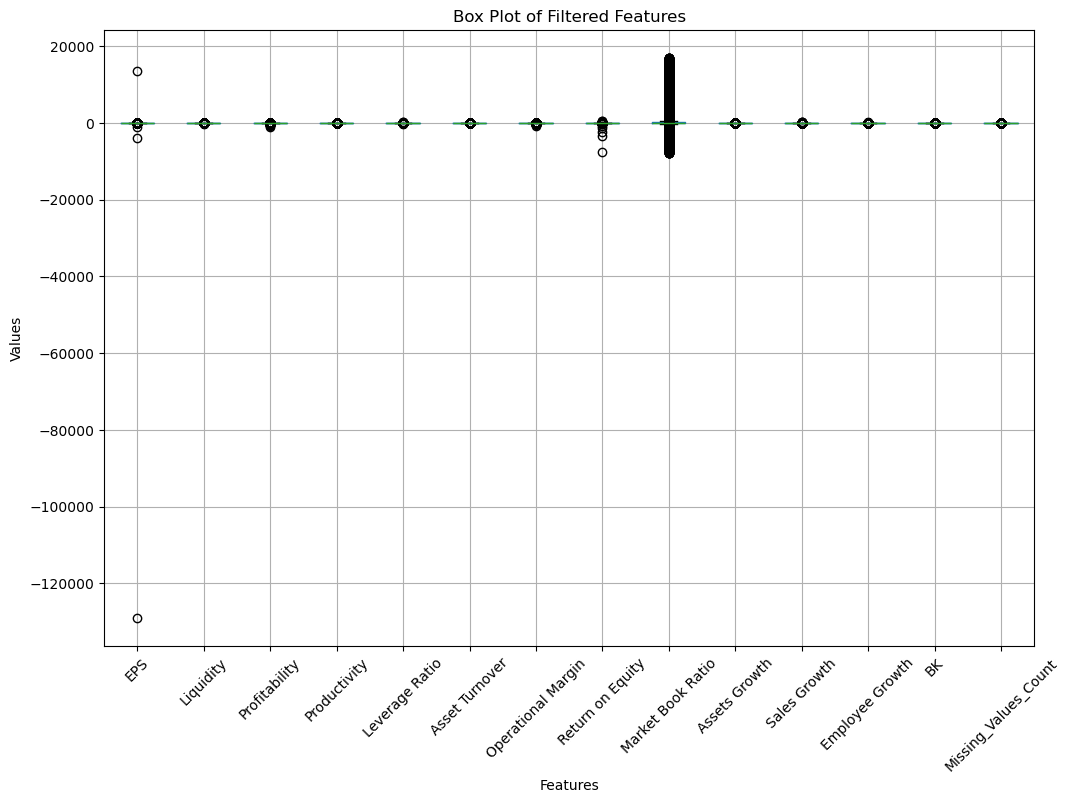

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df_filtered.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Box Plot of Filtered Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [142]:
# Assuming df_outliers_removed_5_95 is your filtered DataFrame
X = df_filtered.drop(columns=['BK'])
y = df_filtered['BK']

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform median imputation on the training data and apply to the test data
median_imputer = SimpleImputer(strategy='median')
X_train_imputed = median_imputer.fit_transform(X_train)
X_test_imputed = median_imputer.transform(X_test)

# Step 3: Standard scaling on training data and transform test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Apply PCA on the training set and transform test set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_resampled)
y_pred_rf_outliers = rf_model.predict(X_test_pca)
y_prob_rf_outliers = rf_model.predict_proba(X_test_pca)[:, 1]

# Step 7: Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_pca, y_train_resampled)
y_pred_xgb_outliers = xgb_model.predict(X_test_pca)
y_prob_xgb_outliers = xgb_model.predict_proba(X_test_pca)[:, 1]

C:\Users\abilp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:23:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [143]:
# Calculate confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf_outliers)
rf_tn, rf_fp, rf_fn, rf_tp = rf_conf_matrix.ravel()

print("Random Forest Model - Confusion Matrix and Metrics")
print("True Negatives (TN):", rf_tn)
print("False Positives (FP):", rf_fp)
print("False Negatives (FN):", rf_fn)
print("True Positives (TP):", rf_tp)
print()
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf_outliers))
print("ROC AUC Score for Random Forest:", roc_auc_score(y_test, y_prob_rf_outliers))

# Calculate confusion matrix for XGBoost
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb_outliers)
xgb_tn, xgb_fp, xgb_fn, xgb_tp = xgb_conf_matrix.ravel()

print("\nXGBoost Model - Confusion Matrix and Metrics")
print("True Negatives (TN):", xgb_tn)
print("False Positives (FP):", xgb_fp)
print("False Negatives (FN):", xgb_fn)
print("True Positives (TP):", xgb_tp)
print()
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb_outliers))
print("ROC AUC Score for XGBoost:", roc_auc_score(y_test, y_prob_xgb_outliers))

Random Forest Model - Confusion Matrix and Metrics
True Negatives (TN): 16469
False Positives (FP): 279
False Negatives (FN): 64
True Positives (TP): 48

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16748
           1       0.15      0.43      0.22       112

    accuracy                           0.98     16860
   macro avg       0.57      0.71      0.60     16860
weighted avg       0.99      0.98      0.98     16860

ROC AUC Score for Random Forest: 0.8947947409498789

XGBoost Model - Confusion Matrix and Metrics
True Negatives (TN): 15970
False Positives (FP): 778
False Negatives (FN): 53
True Positives (TP): 59

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16748
           1       0.07      0.53      0.12       112

    accuracy                           0.95     16860
   macro avg       0.53 

In [144]:
# Compare class distributions before and after cleaning
print("Original class distribution:")
print(df['BK'].value_counts(normalize=True))

print("\nCleaned class distribution:")
print(df_filtered['BK'].value_counts(normalize=True))

# Check if the remaining data is representative
for col in df_filtered.columns:
    if col != 'BK':
        print(f"\nDistribution statistics for {col}:")
        print("Original median:", df[col].median())
        print("Cleaned median:", df_filtered[col].median())

Original class distribution:
BK
0    0.993992
1    0.006008
Name: proportion, dtype: float64

Cleaned class distribution:
BK
0    0.993381
1    0.006619
Name: proportion, dtype: float64

Distribution statistics for EPS:
Original median: 0.33
Cleaned median: 0.4

Distribution statistics for Liquidity:
Original median: 0.19
Cleaned median: 0.2

Distribution statistics for Profitability:
Original median: 0.07
Cleaned median: 0.09

Distribution statistics for Productivity:
Original median: 0.06
Cleaned median: 0.06

Distribution statistics for Leverage Ratio:
Original median: 0.28
Cleaned median: 0.32

Distribution statistics for Asset Turnover:
Original median: 0.83
Cleaned median: 0.85

Distribution statistics for Operational Margin:
Original median: 0.06
Cleaned median: 0.07

Distribution statistics for Return on Equity:
Original median: 0.03
Cleaned median: 0.03

Distribution statistics for Market Book Ratio:
Original median: 58.28
Cleaned median: 62.33

Distribution statistics for Ass